# Sea Level Predictor

## Library imports

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np


## Importing the data

In [2]:
df = pd.read_csv('epa-sea-level.csv')

## Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [4]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [5]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


### Data Analysis

### Plotting our data

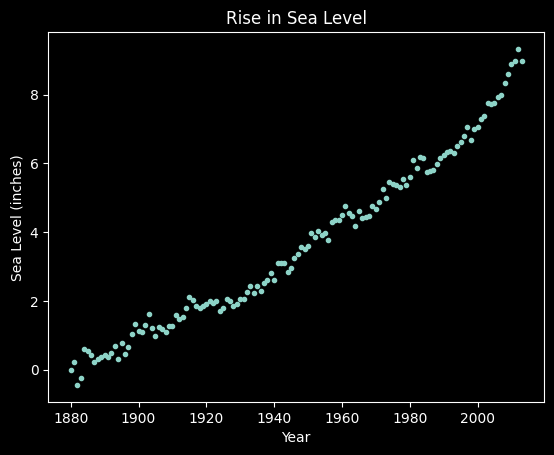

In [6]:
fig, (ax) = plt.subplots(1,1)
ax.set_title('Rise in Sea Level')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)');
ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], marker='.')

### Regressing and predicting sea level rise

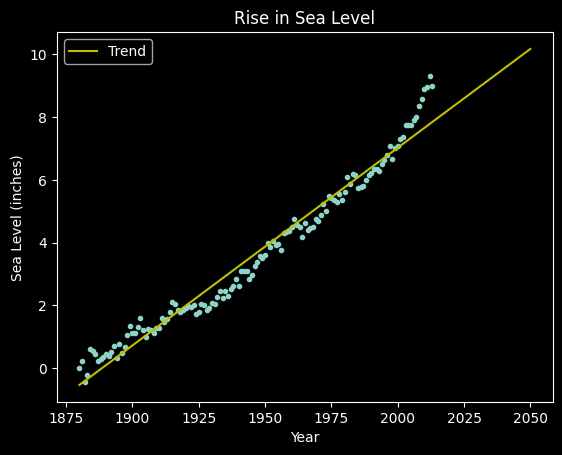

In [7]:
m, b, *_ = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

extended_years = np.arange(df['Year'].min(), 2051, 1)

ax.plot(extended_years, m * extended_years + b, '-y', label='Trend')
ax.legend()
fig

### Regressing and predicting sea-level rise from 2000s

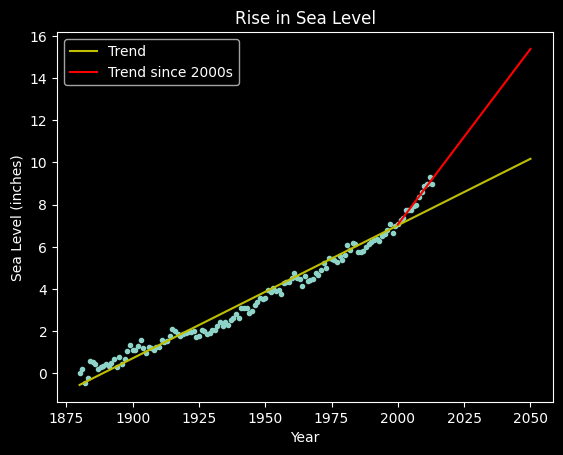

In [8]:
recent_df = df[df['Year'] >= 2000]

m, b, *_ = linregress(recent_df['Year'], recent_df['CSIRO Adjusted Sea Level'])

years = np.arange(2000, 2051, 1)

ax.plot(years, m * years + b, '-r', label='Trend since 2000s')
ax.legend()
fig